In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Keras fashion mnist dataset을 다운로드
* 5만개의 학습용, 1만개의 테스트용 grayscale image array를 다운로드

In [3]:
from tensorflow.keras.datasets import fashion_mnist

# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# image size는 28x28의 grayscale 2차원 데이터
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

4422102/4422102 [==============================] - 0s 0us/step
train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


### MNIST image array 시각화

Text(0.5, 1.0, '9')

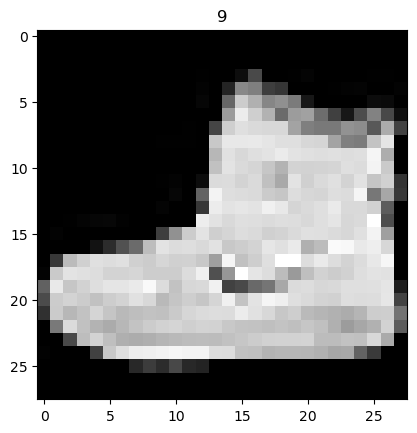

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])

In [5]:
train_images[0, :, :], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

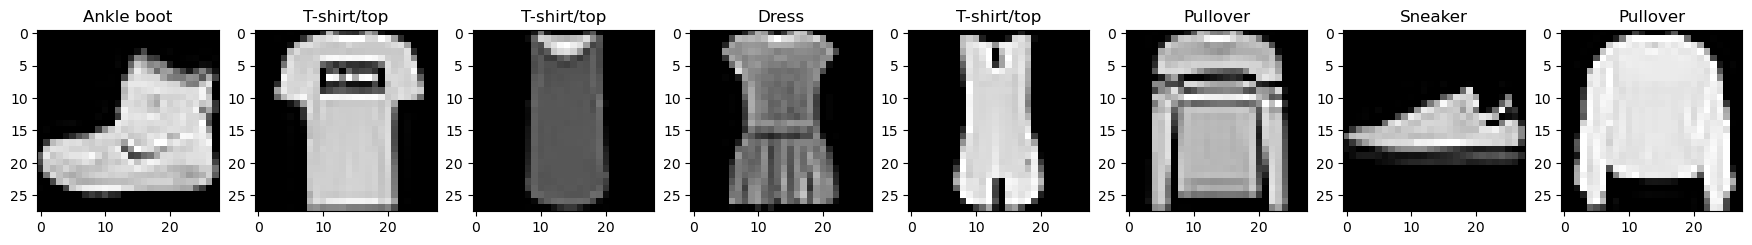

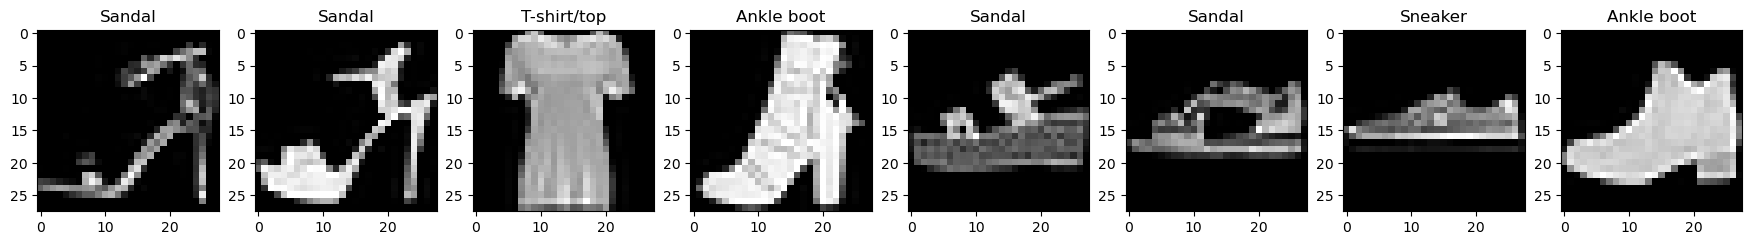

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_names[labels[i]])
        
show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

### 데이터 전처리 수행. 
* 0 ~ 255 사이의 픽셀값을 0 ~ 1 사이 값으로 변환. 
* array type은 float 32

In [7]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)


train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


In [ ]:
train_images[0]

### Dense Layer를 기반으로 모델을 생성

In [8]:
INPUT_SIZE = 28

In [9]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


### 모델의 Loss와 Optimizer 설정하고 학습 수행
* loss는 categorical_crossentropy로, optimizer는 Adam으로 설정
* categorical crossentropy를 위해서 Lable을 OHE 로 변경

In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
#categorical_crossEntropy는 무조건 one hot encoding이 돼야한다. 
#one hot encoding 안할거면 sparse_categorical_crossentropy 써라
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)
#one hot encoding을 해서 2차원이 되었다.
print(train_oh_labels.shape, test_oh_labels.shape)

(60000, 10) (10000, 10)


In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
history = model.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=20, verbose=1)
#train_images는 3차원이 들어갔다.

Epoch 1/20
1875/1875 [==============================] - 14s 4ms/step - loss: 0.5155 - accuracy: 0.8162
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3768 - accuracy: 0.8624
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3399 - accuracy: 0.8758
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3156 - accuracy: 0.8835
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2994 - accuracy: 0.8902
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2855 - accuracy: 0.8952
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2760 - accuracy: 0.8968
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2642 - accuracy: 0.9011
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2549 - accuracy: 0.9043
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.24

In [14]:
print(history.history['loss'])
print(history.history['accuracy'])


[0.515489399433136, 0.37682297825813293, 0.3398991823196411, 0.31564369797706604, 0.2994030714035034, 0.28554466366767883, 0.276012659072876, 0.2641572952270508, 0.2549019157886505, 0.24714668095111847, 0.23703312873840332, 0.23232461512088776, 0.2268795222043991, 0.2214740514755249, 0.2133549004793167, 0.20764701068401337, 0.2028581202030182, 0.19781668484210968, 0.1957406997680664, 0.18958300352096558]
[0.8162333369255066, 0.8624333143234253, 0.8757666945457458, 0.8835166692733765, 0.8902333378791809, 0.8952333331108093, 0.8968166708946228, 0.9010999798774719, 0.9042666554450989, 0.9067333340644836, 0.9108666777610779, 0.9122666716575623, 0.9142166376113892, 0.9160000085830688, 0.9189500212669373, 0.9212166666984558, 0.9232333302497864, 0.92535001039505, 0.9255833625793457, 0.9279166460037231]


### 테스트 데이터를 기반으로 Label 값 예측
* model.predict()를 이용하여 label값 예측
* predict()의 인자로 입력되는 feature array는 학습의 feature array와 shape가 동일해야함. 
* fit() 시 3차원(28x28 2차원 array가 여러개 존재) array 입력 했으므로 predict()도 동일한 3차원 데이터 입력
* 특히 한건만 predict() 할때도 3차원 데이터여야 함. 이를 위해 expand_dims()로 2차원 image 배열을 3차원으로 변경

In [15]:
test_images.shape

(10000, 28, 28)

In [16]:
pred_proba = model.predict(test_images)
print(pred_proba.shape)

313/313 [==============================] - 1s 2ms/step
(10000, 10)


In [18]:
np.expand_dims(test_images[0], axis=0).shape

(1, 28, 28)

In [19]:
#predict()에 data를 넣을때 2차원 이미지 데이터를 3차원으로 수정해야한다.
#이때 np.expand_dims() 함수를 사용한다.
pred_proba = model.predict(np.expand_dims(test_images[0], axis=0))
print('softmax output:', pred_proba)
pred = np.argmax(np.squeeze(pred_proba))#np.squeeze() 함수로 차원 1개 감소시킨다.
print('predicted class value:', pred)


1/1 [==============================] - 0s 33ms/step
softmax output: [[2.4840046e-08 1.0523259e-11 3.4860232e-09 3.2193025e-08 7.4235351e-09
  1.5351288e-03 3.3643985e-08 1.1318721e-02 2.4968870e-08 9.8714602e-01]]
predicted class value: 9


In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print('target class value:', test_labels[0], 'predicted class value:', pred)

target class value: 9.0 predicted class value: 9


### 테스트 데이터 세트로 모델 성능 검증

In [21]:
model.evaluate(test_images, test_oh_labels, batch_size=64)

157/157 [==============================] - 1s 3ms/step - loss: 0.3538 - accuracy: 0.8901


[0.353800892829895, 0.8901000022888184]

### 검증 데이터 세트를 이용하여 학습 수행. 
* 일반적으로 fit() 수행시 별도의 검증 데이터 세트를 이용하여 학습 시 과적합(Overfitting)이 발생하는지 모니터링
* fit()을 수행하면 iteration을 반복하기 때문에 중간에 하이퍼파라미터 변경(예: Learning Rate)등의 작업이 어려움. 
* fit() iteration시 여러 작업을 하기 위해 Callback 객체를 가짐. 
* 검증 데이터 세트를 fit() 시 적용하여 과적합이나 더이상 검증 데이터 성능이 좋아 지지 않을 때 Callback을 사용하여 Learning Rate 보정 작업등을 수행 가능

In [22]:
import numpy as np 
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 기존 학습 데이터를 다시 학습과 검증 데이터 세트로 분리
tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.15, random_state=2021)
print('train과 validation shape:', tr_images.shape, tr_labels.shape, val_images.shape, val_labels.shape)

# OHE 적용
tr_oh_labels = to_categorical(tr_labels)
val_oh_labels = to_categorical(val_labels)

print('after OHE:', tr_oh_labels.shape, val_oh_labels.shape)

train과 validation shape: (51000, 28, 28) (51000,) (9000, 28, 28) (9000,)
after OHE: (51000, 10) (9000, 10)


### 검증 데이터 세트를 적용하여 학습 수행. 

In [25]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

INPUT_SIZE = 28
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, validation_data=(val_images, val_oh_labels), 
                    epochs=20, verbose=1)

Epoch 1/20
399/399 [==============================] - 3s 5ms/step - loss: 0.6097 - accuracy: 0.7914 - val_loss: 0.5131 - val_accuracy: 0.8107
Epoch 2/20
399/399 [==============================] - 2s 5ms/step - loss: 0.4189 - accuracy: 0.8530 - val_loss: 0.4313 - val_accuracy: 0.8423
Epoch 3/20
399/399 [==============================] - 2s 5ms/step - loss: 0.3755 - accuracy: 0.8679 - val_loss: 0.3978 - val_accuracy: 0.8553
Epoch 4/20
399/399 [==============================] - 2s 5ms/step - loss: 0.3496 - accuracy: 0.8746 - val_loss: 0.3709 - val_accuracy: 0.8651
Epoch 5/20
399/399 [==============================] - 2s 5ms/step - loss: 0.3300 - accuracy: 0.8811 - val_loss: 0.3585 - val_accuracy: 0.8711
Epoch 6/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3133 - accuracy: 0.8870 - val_loss: 0.3750 - val_accuracy: 0.8651
Epoch 7/20
399/399 [==============================] - 2s 5ms/step - loss: 0.3025 - accuracy: 0.8902 - val_loss: 0.3313 - val_accuracy: 0.8808
Epoch 

In [27]:
print(history.history['loss'])
print(history.history['accuracy'])
print(history.history['val_loss'])
print(history.history['val_accuracy'])

[0.6097484827041626, 0.4188779592514038, 0.3754792809486389, 0.34957650303840637, 0.32996535301208496, 0.31333309412002563, 0.30254805088043213, 0.28907454013824463, 0.2835388779640198, 0.27229201793670654, 0.2635591924190521, 0.25531381368637085, 0.24623385071754456, 0.2401169389486313, 0.23373515903949738, 0.226803258061409, 0.22155636548995972, 0.2173692137002945, 0.21116700768470764, 0.20616690814495087]
[0.7914313673973083, 0.8529999852180481, 0.8678627610206604, 0.8745686411857605, 0.8811372518539429, 0.8870392441749573, 0.8901764750480652, 0.8948431611061096, 0.8960784077644348, 0.9001960754394531, 0.9031960964202881, 0.905098021030426, 0.9097254872322083, 0.9110588431358337, 0.9142156839370728, 0.9175686240196228, 0.9171960949897766, 0.9205294251441956, 0.9229803681373596, 0.9229607582092285]
[0.513135552406311, 0.43134984374046326, 0.39784517884254456, 0.3709148168563843, 0.35852694511413574, 0.37495264410972595, 0.3313458263874054, 0.3353188931941986, 0.354628324508667, 0.334

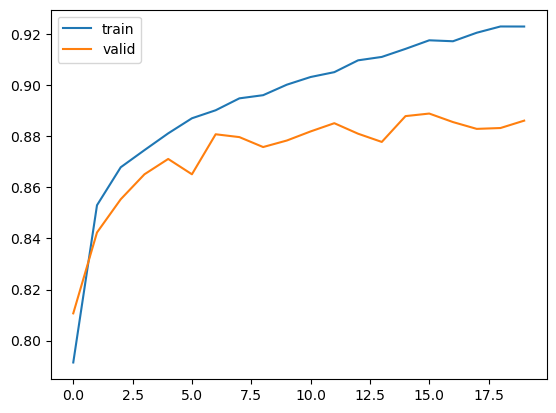

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()

### Functional API

In [ ]:
# Sequential Model을 이용하여 Keras 모델 생성 
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

model1 = Sequential()
model1.add(Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(30, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.summary()


In [ ]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
x = Flatten()(input_tensor)
x = Dense(100, activation='relu')(x)
x = Dense(30, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

### Custom한 Dense Layer 생성하기

In [ ]:
from tensorflow.keras.layers import Layer, Input
from tensorflow.keras.models import Model
import tensorflow as tf

class CustomDense(tf.keras.layers.Layer):
    # CustomDense 객체 생성시 입력되는 초기화 parameter 처리
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )
        
    # CustomDense 객체에 callable로 입력된 입력 데이터 처리. 
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

# input 값을 4개의 원소를 가지는 1차원으로 생성. 
inputs = Input((4,))
# 10개의 unit을 가지는 CustomDense 객체를 생성 후 callable로 inputs값 입력 
outputs = CustomDense(10)(inputs)

# inputs와 outputs로 model 생성. 
model = Model(inputs, outputs)
model.summary()


### Functional API는 객체 생성 부분과 Callable 인자 입력 부분을 별도로 수행해도 무방. 

In [ ]:
inputs = Input((4,))
# 10개의 unit을 가지는 CustomDense 객체를 생성 후 callable로 inputs값 입력 
my_layer = CustomDense(10)
outputs = my_layer(inputs)

# inputs와 outputs로 model 생성. 
model = Model(inputs, outputs)
model.summary()

### Sequential Model 생성은 단지 Functional API Layer들을 iteration 하면서 연결한 것을 model로 만든 것임

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential([Input((4,)),
                   CustomDense(10),
                   CustomDense(8), 
                   tf.keras.layers.ReLU()])
model.summary()

### Sequential Model을 Functional 객체를 For loop 반복 호출하여 작성.

In [ ]:
layers_list = [Input((4,)), CustomDense(10), CustomDense(8), tf.keras.layers.ReLU()]

for index, layer in enumerate(layers_list):
        print(index, layer)

In [ ]:
layers_list = [Input((4,)), CustomDense(10), CustomDense(8), tf.keras.layers.ReLU()]

inputs = None
callable_inputs = None
outputs = None
# layers_list에 있는 Functional 객체를 iteration 수행하면서 적용. 
for index, layer in enumerate(layers_list):
    # layers_list의 첫번째 인자는 Input 간주. 
    if index == 0:
        inputs = layer
        callable_inputs = layer
    # Functional 객체에 callable 인자로 callable_inputs를 입력하고 반환 결과 값을 다시 callable_inputs로 할당.     
    else: 
        callable_inputs = layer(callable_inputs)
    
outputs = callable_inputs
model = Model(inputs, outputs)
model.summary()


### 앞에서 생성한 로직들을 함수화 
* Functional API로 모델 만들기
* pixel값 1 ~ 255를 0 ~ 1사이값 Float 32로 만들기
* One Hot Encoding Label에 적용하기
* 학습과 검증 데이터로 나누기.
* compile, 학습/예측/평가

In [1]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

INPUT_SIZE = 28

def create_model():
    #input_shape는 sequential model일때 입력값만 들어오는걸 layer에서 수용할때 사용
    input_tensor = Input(shape = (INPUT_SIZE, INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(100,activation = 'relu')(x)
    x = Dense(30,activation = 'relu')(x)
    output = Dense(10,activation = 'softmax')(x)
    
    model = Model(inputs = input_tensor,outputs = output)#input, output이 여러개일 수 있다.
    return model

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 0 ~ 1사이값의 float32로 변경하는 함수
def get_preprocessed_data(images, labels):
    images = np.array(images/255.0,dtype = np.float32)
    labels = np.array(labels, dtype = np.float32)
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    oh_labels = to_categorical(labels)
    return images, oh_labels
    
# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환 
def get_train_valid_test_set(train_images,train_labels,test_images,test_labels,valid_size = 0.15,random_state = 2021):
    
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    tr_images, val_images, tr_oh_labels,val_oh_labels = train_test_split(train_images,train_oh_labels,test_size = valid_size, random_state = random_state)
    return (tr_images,tr_oh_labels),(val_images, val_oh_labels),(test_images,test_oh_labels)


In [3]:
from tensorflow.keras.datasets import fashion_mnist
# Fashion MNIST 데이터 재 로딩 및 전처리 적용하여 학습/검증/데이터 세트 생성. 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape,train_labels.shape,test_images.shape,test_labels.shape)
(tr_images,tr_oh_labels),(val_images, val_oh_labels),(test_images,test_oh_labels) = get_train_valid_test_set(train_images,train_labels,test_images,test_labels,valid_size = 0.15,random_state = 2021)
print(tr_images.shape, tr_oh_labels.shape,val_images.shape,val_oh_labels.shape,test_images.shape,test_labels.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(51000, 28, 28) (51000, 10) (9000, 28, 28) (9000, 10) (10000, 28, 28) (10000,)


In [4]:
from tensorflow.keras.optimizers import Adam

# Model 생성 및 optimizer, loss, metric 적용
model = create_model()
model.summary()

model.compile(optimizer = Adam(0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 학습 수행. 
history = model.fit(x = tr_images,y = tr_oh_labels, batch_size = 128,epochs = 20,validation_data = (val_images,val_oh_labels))

Epoch 1/20
399/399 [==============================] - 9s 5ms/step - loss: 0.6136 - accuracy: 0.7917 - val_loss: 0.4883 - val_accuracy: 0.8223
Epoch 2/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4184 - accuracy: 0.8530 - val_loss: 0.4404 - val_accuracy: 0.8448
Epoch 3/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3776 - accuracy: 0.8687 - val_loss: 0.3731 - val_accuracy: 0.8690
Epoch 4/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3495 - accuracy: 0.8752 - val_loss: 0.3613 - val_accuracy: 0.8694
Epoch 5/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3301 - accuracy: 0.8811 - val_loss: 0.3590 - val_accuracy: 0.8683
Epoch 6/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3150 - accuracy: 0.8864 - val_loss: 0.3785 - val_accuracy: 0.8663
Epoch 7/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3009 - accuracy: 0.8905 - val_loss: 0.3644 - val_accuracy: 0.8704
Epoch 

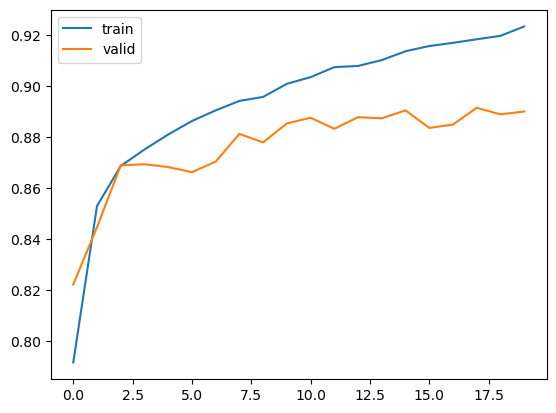

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

In [7]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images,test_oh_labels,batch_size = 256, verbose = 1)

40/40 [==============================] - 0s 3ms/step - loss: 0.3491 - accuracy: 0.8842


[0.3490918278694153, 0.8841999769210815]

### Callback 

#### ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
* 특정 조건에 맞춰서 모델을 파일로 저장
* filepath: filepath는 (on_epoch_end에서 전달되는) epoch의 값과 logs의 키로 채워진 이름 형식 옵션을 가질 수 있음.
예를 들어 filepath가 weights.{epoch:02d}-{val_loss:.2f}.hdf5라면, 파일 이름에 세대 번호와 검증 손실을 넣어 모델의 체크포인트가 저장 
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* save_best_only: 가장 좋은 성능을 나타내는 모델만 저장할 여부
* save_weights_only: Weights만 저장할 지 여부 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 자동으로 유추. 

In [ ]:
!pwd

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

mcp_cb = ModelCheckpoint(filepath='/kaggle/working/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', 
                         save_best_only=True, save_weights_only=True, mode='min', period=3, verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=10, validation_data=(val_images, val_oh_labels),
                   callbacks=[mcp_cb])

In [ ]:
!ls -lia
#!rm -rf weight*
#!ls -lia


#### ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
* 특정 epochs 횟수동안 성능이 개선 되지 않을 시 Learning rate를 동적으로 감소 시킴 
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* factor: 학습 속도를 줄일 인수. new_lr = lr * factor 
* patience: Learing Rate를 줄이기 전에 monitor할 epochs 횟수. 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 유추. 

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels),
                   callbacks=[rlr_cb])

#### EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
* 특정 epochs 동안 성능이 개선되지 않을 시 학습을 조기에 중단
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* patience: Early Stopping 적용 전에 monitor할 epochs 횟수. 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 유추. 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

ely_cb = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels),
                   callbacks=[ely_cb])

In [ ]:
!rm weigh*

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

mcp_cb = ModelCheckpoint(filepath='/kaggle/working/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', 
                         save_best_only=True, save_weights_only=True, mode='min', period=1, verbose=0)
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=7, mode='min', verbose=1)

history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=40, validation_data=(val_images, val_oh_labels),
                   callbacks=[mcp_cb, rlr_cb, ely_cb])

In [ ]:
!ls -lia